In [2]:
from configparser import ConfigParser
from os.path import expanduser
import sqlalchemy
import psycopg
from sqlalchemy.sql import text
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def config(section='inventaire-local', filename=expanduser("~") + '/databases.ini'):
    #création d'un parseur
    parser = ConfigParser()
    #lecture du fichier de configuration
    parser.read(filename)

    #récupération de la section passée en paramètre ("confinement" par défaut)
    db = {}
    if parser.has_section(section):
        params = parser.items(section)
        for param in params:
            db[param[0]] = param[1]
    else:
        raise Exception(f'Section {section} absente du fichier {filename}')

    return db

In [4]:
# Connexion à la base de données référencée comme "inventaire-local"
params = config('inventaire-local')
try:
    #conn = psycopg2.connect(**params)
    url = f"postgresql+psycopg2://{params['user']}@{params['host']}:5432/{params['dbname']}"
    engine = sqlalchemy.create_engine(url)
except Exception as e:
    print(f'Impossible de se connecter à "inv-dev", {e}')

In [5]:
req = """SELECT c.millesime AS campagne, e.id_ech, pe.id_point, pe.zp
FROM campagne c
INNER JOIN echantillon e USING (id_campagne)
INNER JOIN point_ech pe USING (id_ech)
WHERE e.phase_stat = 1
AND e.type_ech = 'P'
AND e.ech_parent IS NULL;
"""

In [6]:
df = pd.read_sql_query(req, con=engine)
df.head()

,campagne,id_ech,id_point,zp
0,2005,1,1,23
1,2005,1,2,39
2,2005,1,3,45
3,2005,1,4,22
4,2005,1,5,56


In [8]:
x = df[df["campagne"] == 2005]["zp"]

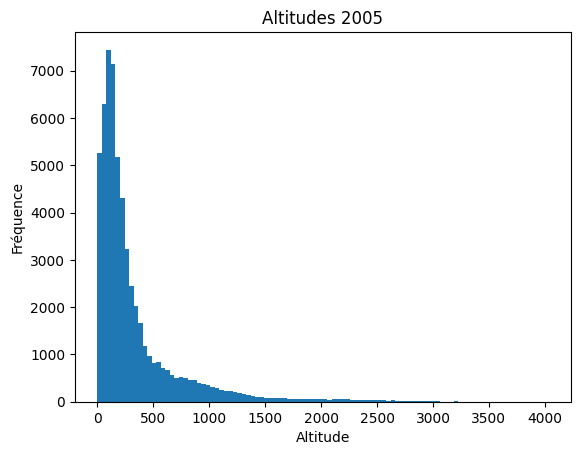

In [13]:
plt.hist(x, bins=100)
plt.gca().set(title='Altitudes 2005', ylabel='Fréquence', xlabel='Altitude');

In [14]:
df["campagne"].unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [28]:
1%5

1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


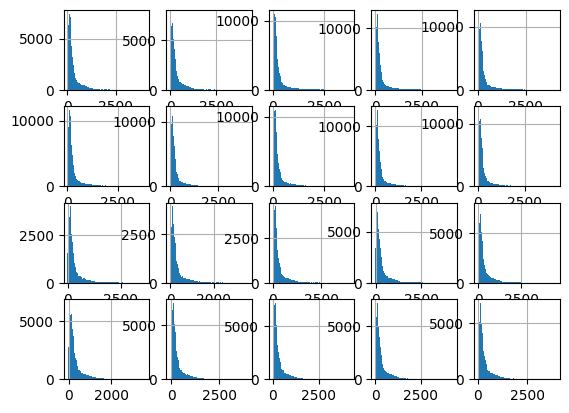

In [33]:
i = 0
fig, axes = plt.subplots(4, 5)
for annee in df["campagne"].unique():
    x = df[df["campagne"] == annee]["zp"]
    print(i)
    x.hist(bins=100, ax=axes[i//5, i%5])
    i += 1

In [34]:
x_2023 = df[df["campagne"] == 2023]["zp"]
x_2024 = df[df["campagne"] == 2024]["zp"]

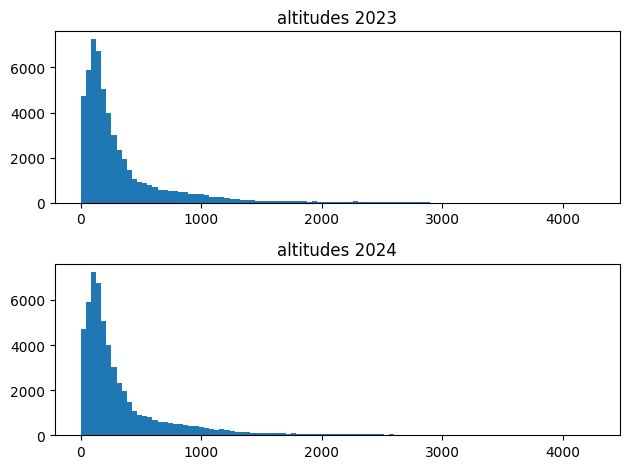

In [50]:
fig, (axes_2023, axes_2024) = plt.subplots(2, 1)
axes_2023.hist(x_2023, bins=100)
axes_2023.set_title("altitudes 2023")
axes_2024.hist(x_2023, bins=100)
axes_2024.set_title("altitudes 2024")
fig.tight_layout()
plt.show()